In [1]:
#!pip install stop-words

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

#Ploting Packages
import nltk
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from stop_words import get_stop_words
import re

### Worldcloud Modules
from wordcloud import WordCloud
from wordcloud import WordCloud,STOPWORDS

#ML Modules
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [3]:
df = pd.read_csv("spam.csv",encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
### Droping the unnecessary columns and remaining
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)
df.columns=["Class","Text"]
df["Label"]=df.Class.map({"ham":0,"spam":1})
df.head()

,Class,Text,Label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [5]:
df.groupby("Class").describe(include="O")

Text                                                               
      count unique                                                top freq
Class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [6]:
df["Text"]=df["Text"].str.lower()

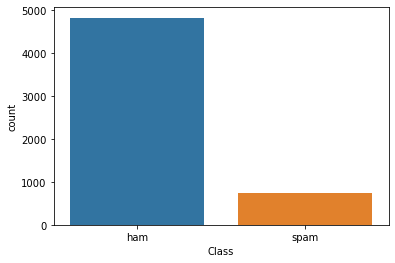

In [7]:
sns.countplot(data=df,x="Class");

In [8]:
Ham_texts=df.query("Class=='ham'")["Text"]
Spam_texts=df.query("Class=='spam'")["Text"]

In [9]:
Ham_texts

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
6       even my brother is not like to speak with me. ...
                              ...                        
5565                                         huh y lei...
5568                will ì_ b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: Text, Length: 4825, dtype: object

In [10]:
def words_cleaner(data):
    words=[re.sub("[a-zA-Z]"," ",i) for i in df["Text"]]
    words=[i.lower() for j in data for i in j.split()] ## Spliting all the sentences into words 
    words=[i for i in words if not i in set(stopwords.words("english"))] ###removing stopwords
    words=[i for i in words if len(i)>2]### removing words with less than two characters
    return words

In [11]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    wc=WordCloud(background_color=bgcolor,max_words=100)
    wc.generate(" ".join(data))
    plt.imshow(wc)
    plt.axis("off")

In [13]:
ham_words=words_cleaner(Ham_texts) ###Cleaning using the function we created
ham_words_freq=nltk.FreqDist(ham_words)
ham_words_freq=pd.DataFrame(ham_words_freq.most_common(10), columns=["Top_Words","Frequency"])

In [14]:
ham_words_freq

,Top_Words,Frequency
0,i'm,369
1,get,293
2,&lt;#&gt;,276
3,got,227
4,like,221
5,call,215
6,come,215
7,know,208
8,good,187
9,i'll,167


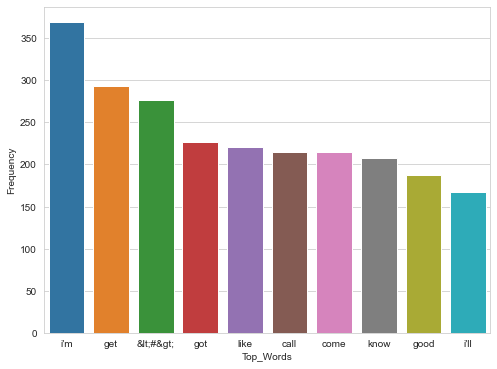

In [15]:
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
ax=sns.barplot(x="Top_Words",y="Frequency",data=ham_words_freq)

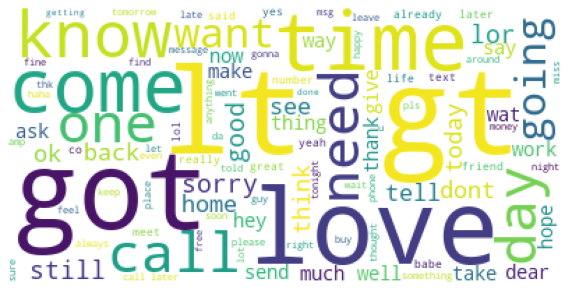

In [16]:
wc(ham_words,"white")

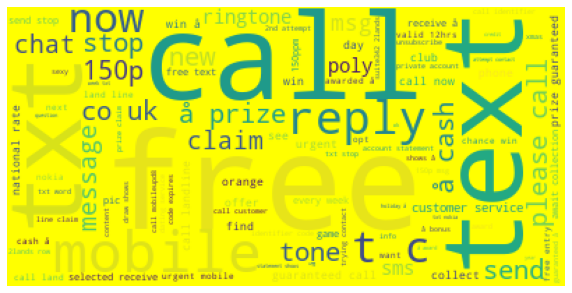

In [17]:
wc(words_cleaner(Spam_texts),"yellow")

In [18]:
def features_cleaner(data):
    clean_txt = []
    for i in range(0,len(data)):
        text=re.sub("[^a-zA-Z]"," ",data[i])
        text=text.lower()
        text=text.split()
        ps=PorterStemmer()
        text=[ps.stem(j) for j in text if not j in set(stopwords.words("english"))]
        text=" ".join(text)
        clean_txt.append(text)
    return clean_txt

In [19]:
X= features_cleaner(df["Text"])
y= df["Label"]

In [20]:
for i in range(0,3):
    print(df["Text"][i])
print("********************  After Cleaning ****************")
for i in range(0,3):
    print(X[i])

go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...
ok lar... joking wif u oni...
free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's
********************  After Cleaning ****************
go jurong point crazi avail bugi n great world la e buffet cine got amor wat
ok lar joke wif u oni
free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli


In [21]:
cv = CountVectorizer()  ### Kukla değişken Dummy variable

X=cv.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=50)

In [22]:
pd.DataFrame(X_train)

,0
0,"(0, 830)\t1\n (0, 5727)\t1\n (0, 3538)\t1\..."
1,"(0, 322)\t1\n (0, 1540)\t1"
2,"(0, 2431)\t1\n (0, 1038)\t1\n (0, 635)\t1"
3,"(0, 1270)\t1\n (0, 4466)\t1\n (0, 972)\t1\..."
4,"(0, 2148)\t1\n (0, 5886)\t1\n (0, 5044)\t2..."
...,...
4174,"(0, 3928)\t1\n (0, 3399)\t1\n (0, 1129)\t1..."
4175,"(0, 3185)\t1\n (0, 5849)\t1\n (0, 3119)\t1..."
4176,"(0, 4268)\t1\n (0, 1892)\t1\n (0, 221)\t1"
4177,"(0, 3291)\t1\n (0, 4403)\t1\n (0, 312)\t1\..."


In [23]:
classifier=MultinomialNB()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [24]:
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[1178,   15],
       [  16,  184]])

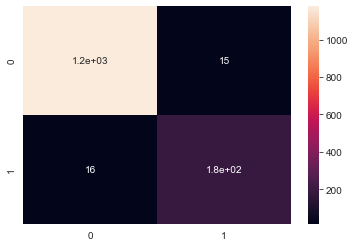

In [26]:
sns.heatmap(cf_matrix, annot=True);

In [27]:
accuracy_score(y_pred,y_test)

0.9777458722182341

In [30]:
from sklearn.ensemble import RandomForestClassifier
r = RandomForestClassifier()
from sklearn.tree import DecisionTreeClassifier
d = DecisionTreeClassifier()

In [31]:
r.fit(X_train,y_train)
y_pred=r.predict(X_test)

In [32]:
r_matrix=confusion_matrix(y_test,y_pred)
r_matrix

array([[1191,    2],
       [  37,  163]])

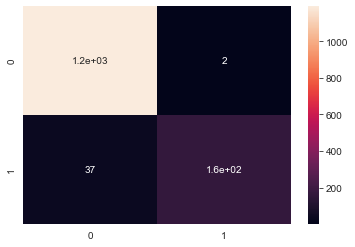

In [34]:
sns.heatmap(r_matrix,annot=True);

In [36]:
d.fit(X_train,y_train)
y_pred=d.predict(X_test)

In [37]:
d_matrix=confusion_matrix(y_test,y_pred)
d_matrix

array([[1179,   14],
       [  33,  167]])